In [1]:
import sys
import os
import streamlit as st
from langchain_groq import ChatGroq
from dotenv import load_dotenv
from typing_extensions import TypedDict

# Use current working directory for notebooks
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from langgraph.graph import StateGraph, START, END
from state.state_llm import ChatMessage
from nodes.chat_nodes import chat_func,chat_func2
load_dotenv()

/workspaces/gdpr_chat/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

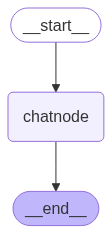

In [2]:
chat_graph=StateGraph(ChatMessage)
chat_graph.add_node("chatnode",chat_func2)
chat_graph.add_edge(START,"chatnode")
chat_graph.add_edge("chatnode",END)

chat_graph_run=chat_graph.compile()

from IPython.display import Image, display
display(Image(chat_graph_run.get_graph(xray=True).draw_mermaid_png()))

In [5]:
from langchain_core.messages import SystemMessage, HumanMessage

system_prompt = (
    "You are a GDPR expert. Answer the question based on the context provided and your own understanding. "
    "If you don't know the answer, just say that you don't know, don't try to make up an answer."
)

chat_graph_run.invoke({
    "messages": [
        SystemMessage(content=system_prompt),
        HumanMessage(content="What are different clauses in GDPR?")
    ]
})

ValidationError: 5 validation errors for HumanMessage
content.str
  Input should be a valid string [type=string_type, input_value=[SystemMessage(content="Y...e6f-8a68-da37abddaee1')], input_type=list]
    For further information visit https://errors.pydantic.dev/2.11/v/string_type
content.list[union[str,dict[any,any]]].0.str
  Input should be a valid string [type=string_type, input_value=SystemMessage(content="Yo...4c91-b0eb-e75066fa1742'), input_type=SystemMessage]
    For further information visit https://errors.pydantic.dev/2.11/v/string_type
content.list[union[str,dict[any,any]]].0.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=SystemMessage(content="Yo...4c91-b0eb-e75066fa1742'), input_type=SystemMessage]
    For further information visit https://errors.pydantic.dev/2.11/v/dict_type
content.list[union[str,dict[any,any]]].1.str
  Input should be a valid string [type=string_type, input_value=HumanMessage(content='Wha...4e6f-8a68-da37abddaee1'), input_type=HumanMessage]
    For further information visit https://errors.pydantic.dev/2.11/v/string_type
content.list[union[str,dict[any,any]]].1.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=HumanMessage(content='Wha...4e6f-8a68-da37abddaee1'), input_type=HumanMessage]
    For further information visit https://errors.pydantic.dev/2.11/v/dict_type

In [3]:
state={"messages": "What are different clauses in GDPR?"}
res = chat_graph_run.invoke(state)
print(res["messages"])

[HumanMessage(content='What are different clauses in GDPR?', additional_kwargs={}, response_metadata={}, id='cf4ff6f0-eb98-49a4-bc0d-9e8f90e7611f'), AIMessage(content="The GDPR is structured into several key clauses that outline the rights and obligations concerning personal data protection. Here are the main clauses:\n\n1. **Article 4: Definitions** - Clarifies key terms used in the GDPR, such as personal data and consent.\n\n2. **Article 5: Data Processing Principles** - Establishes principles for lawful, fair, and transparent data processing.\n\n3. **Article 12-23: Rights of Data Subjects** - Includes rights like access, rectification, erasure (right to be forgotten), restriction of processing, data portability, and objection.\n\n4. **Article 17: Right to Erasure (Right to be Forgotten)** - Allows individuals to request the deletion of their personal data under certain conditions.\n\n5. **Article 20: Right to Data Portability** - Enables individuals to obtain and transfer their data